<a href="https://colab.research.google.com/github/bhuvan-j/Data-Science/blob/main/CNN_Implementation_using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CNN on MNIST Fashion Dataset

In [17]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Input,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.utils import np_utils
import tensorflow
import matplotlib.pyplot as plt


In [4]:
#Data Preparation
x= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/fashion-mnist.csv")
X_ = np.array(x)

In [7]:
X = X_[:,1:]
X = X/255.0
y = X_[:,0]
print(X.shape,y.shape) #10k images and 784 features

(10000, 784) (10000,)


In [11]:
np.unique(y,return_counts=True) #means there are 10 classes in y.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))

In [12]:
X_train = X.reshape((10000,28,28,1))
Y_train = np_utils.to_categorical(y)

In [13]:
print(X_train.shape,Y_train.shape)

(10000, 28, 28, 1) (10000, 10)


In [15]:
Y_train[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

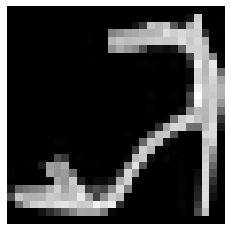

In [24]:
plt.imshow(X_train[8].reshape(28,28),cmap="gray")
plt.axis(False)
plt.show()


In [25]:
#CNN Model using Keras

In [26]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation="relu",input_shape=(28,28,1)))
model.add(Convolution2D(64,(3,3),activation="relu"))
model.add( Dropout(0.25) )
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(32,(5,5),activation="relu"))
model.add(Convolution2D(8,(5,5),activation="relu"))
model.add(Flatten())
model.add(Dense(10,activation="softmax"))
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 32)          51232     
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 8)           6408      
                                                        

In [30]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [31]:
hist = model.fit(X_train,Y_train,epochs=20,shuffle=True,batch_size=256,validation_split=0.2)

Epoch 1/20
32/32 [==============================] - 32s 990ms/step - loss: 1.6762 - accuracy: 0.4111 - val_loss: 1.0663 - val_accuracy: 0.6040
Epoch 2/20
32/32 [==============================] - 37s 1s/step - loss: 0.8662 - accuracy: 0.6911 - val_loss: 0.7595 - val_accuracy: 0.7175
Epoch 3/20
32/32 [==============================] - 46s 1s/step - loss: 0.7052 - accuracy: 0.7400 - val_loss: 0.6769 - val_accuracy: 0.7465
Epoch 4/20
32/32 [==============================] - 44s 1s/step - loss: 0.6145 - accuracy: 0.7697 - val_loss: 0.6650 - val_accuracy: 0.7730
Epoch 5/20
32/32 [==============================] - 29s 913ms/step - loss: 0.5726 - accuracy: 0.7916 - val_loss: 0.5737 - val_accuracy: 0.7960
Epoch 6/20
32/32 [==============================] - 29s 915ms/step - loss: 0.5203 - accuracy: 0.8095 - val_loss: 0.5484 - val_accuracy: 0.8060
Epoch 7/20
32/32 [==============================] - 30s 937ms/step - loss: 0.4889 - accuracy: 0.8216 - val_loss: 0.5247 - val_accuracy: 0.8170
Epoch 8/

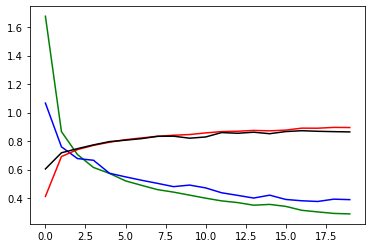

In [32]:
plt.figure(0)
plt.plot(hist.history["loss"],'g')
plt.plot(hist.history["val_loss"] , 'b')
plt.plot(hist.history["accuracy"],'r')
plt.plot(hist.history["val_accuracy"],'black')
plt.show()
